# EDA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
%matplotlib inline

sns.set_theme(style="ticks")

## Read Dataset


The training dataset consists of over a million of anonymized hotel reservations, based on real data, with the following features:

- **user_id** - User ID
- **check-in** - Reservation check-in date
- **checkout** - Reservation check-out date
- **city_id** - city_id of the hotel’s city (anonymized)
- **device_class** - desktop/mobile
- **affiliate_id** - An anonymized ID of affiliate channels where the booker came from (e.g. direct, some third party referrals, paid search engine, etc.)
- **booker_country** - Country from which the reservation was made (anonymized)
- **hotel_country** - Country of the hotel (anonymized)
- **utrip_id** - Unique identification of user’s trip (a group of multi-destinations bookings within the same trip)

In [2]:
df = pd.read_csv('../data/Booking/booking_train_set.csv', 
                 dtype={"user_id": str, "city_id": str, 'affiliate_id': str,
                       'utrip_id': str},date_parser=['checkin', 'checkin'])

df.head()

,Unnamed: 0,user_id,checkin,checkout,city_id,device_class,affiliate_id,booker_country,hotel_country,utrip_id
0,0,1006220,2016-04-09,2016-04-11,31114,desktop,384,Gondal,Gondal,1006220_1
1,1,1006220,2016-04-11,2016-04-12,39641,desktop,384,Gondal,Gondal,1006220_1
2,2,1006220,2016-04-12,2016-04-16,20232,desktop,384,Gondal,Glubbdubdrib,1006220_1
3,3,1006220,2016-04-16,2016-04-17,24144,desktop,384,Gondal,Gondal,1006220_1
4,4,1010293,2016-07-09,2016-07-10,5325,mobile,359,The Devilfire Empire,Cobra Island,1010293_1


In [3]:
df.shape

(1166835, 10)

In [4]:
profile = ProfileReport(df, title="Pandas Profiling Report")
profile

## user_id

- **user_id** - User ID

In [5]:
df.head()

,Unnamed: 0,user_id,checkin,checkout,city_id,device_class,affiliate_id,booker_country,hotel_country,utrip_id
0,0,1006220,2016-04-09,2016-04-11,31114,desktop,384,Gondal,Gondal,1006220_1
1,1,1006220,2016-04-11,2016-04-12,39641,desktop,384,Gondal,Gondal,1006220_1
2,2,1006220,2016-04-12,2016-04-16,20232,desktop,384,Gondal,Glubbdubdrib,1006220_1
3,3,1006220,2016-04-16,2016-04-17,24144,desktop,384,Gondal,Gondal,1006220_1
4,4,1010293,2016-07-09,2016-07-10,5325,mobile,359,The Devilfire Empire,Cobra Island,1010293_1


In [6]:
df_user_group = df.groupby('user_id').count()[['checkin']].sort_values('checkin',ascending=False)
#pd.concat([df_user_group.head(), df_user_group.tail()])

In [7]:
df_user_group.describe()

,checkin
count,200153.000000
mean,5.829715
std,3.021691
min,1.000000
25%,4.000000
50%,5.000000
75%,6.000000
max,172.000000


In [8]:
#sns.histplot(df_user_group, x="checkin")

<AxesSubplot:xlabel='checkin'>

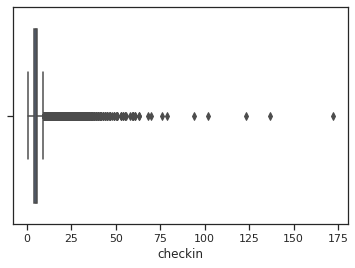

In [9]:
sns.boxplot(x="checkin", data=df_user_group)

## checkin - checkout

- **check-in** - Reservation check-in date
- **checkout** - Reservation check-out date

In [4]:
df.head()

,Unnamed: 0,user_id,checkin,checkout,city_id,device_class,affiliate_id,booker_country,hotel_country,utrip_id
0,0,1006220,2016-04-09,2016-04-11,31114,desktop,384,Gondal,Gondal,1006220_1
1,1,1006220,2016-04-11,2016-04-12,39641,desktop,384,Gondal,Gondal,1006220_1
2,2,1006220,2016-04-12,2016-04-16,20232,desktop,384,Gondal,Glubbdubdrib,1006220_1
3,3,1006220,2016-04-16,2016-04-17,24144,desktop,384,Gondal,Gondal,1006220_1
4,4,1010293,2016-07-09,2016-07-10,5325,mobile,359,The Devilfire Empire,Cobra Island,1010293_1


In [5]:
df['checkin'] = pd.to_datetime(df['checkin'])
df['checkout'] = pd.to_datetime(df['checkout'])

df['duration'] = (df['checkout'] - df['checkin']).dt.days
df.head()

,Unnamed: 0,user_id,checkin,checkout,city_id,device_class,affiliate_id,booker_country,hotel_country,utrip_id,duration
0,0,1006220,2016-04-09,2016-04-11,31114,desktop,384,Gondal,Gondal,1006220_1,2
1,1,1006220,2016-04-11,2016-04-12,39641,desktop,384,Gondal,Gondal,1006220_1,1
2,2,1006220,2016-04-12,2016-04-16,20232,desktop,384,Gondal,Glubbdubdrib,1006220_1,4
3,3,1006220,2016-04-16,2016-04-17,24144,desktop,384,Gondal,Gondal,1006220_1,1
4,4,1010293,2016-07-09,2016-07-10,5325,mobile,359,The Devilfire Empire,Cobra Island,1010293_1,1


In [6]:
df_group_checkin = df.groupby('checkin').agg({'user_id': 'count', 'duration': 'mean'})
df_group_checkin['duration_7d'] = df_group_checkin['duration'].rolling(window=7).mean()
df_group_checkin.describe()

,user_id,duration,duration_7d
count,425.000000,425.000000,419.000000
mean,2745.494118,1.724009,1.729846
std,2032.329699,0.119197,0.093405
min,3.000000,1.000000,1.379362
25%,1329.000000,1.651425,1.651635
50%,2147.000000,1.717949,1.712189
75%,3257.000000,1.799754,1.799976
max,9672.000000,2.110390,2.019089


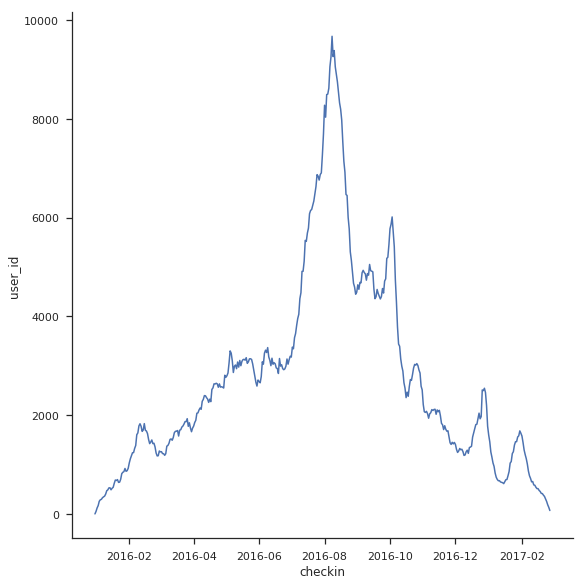

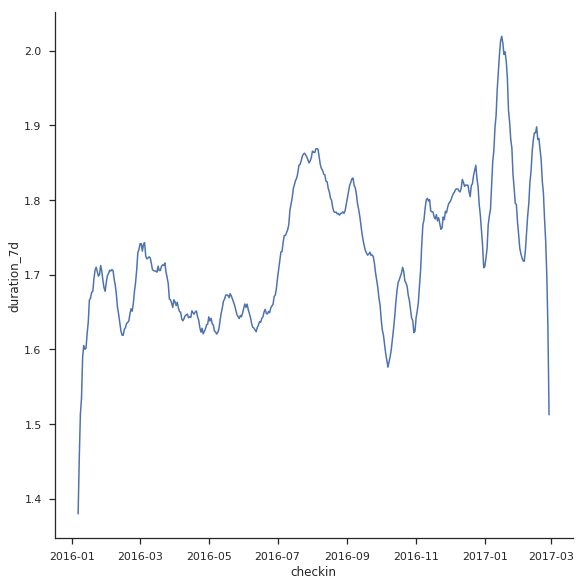

In [7]:

g = sns.relplot(
    data=df_group_checkin,
    x="checkin", y="user_id", kind="line", height=8
)

g = sns.relplot(
    data=df_group_checkin,
    x="checkin", y="duration_7d", kind="line", height=8
)

In [28]:
pd.to_datetime(df['checkin'].astype(int)/10**9/60/60/24, unit='d')

0         2016-04-09
1         2016-04-11
2         2016-04-12
3         2016-04-16
4         2016-07-09
             ...    
1166830   2016-09-13
1166831   2016-12-13
1166832   2016-12-16
1166833   2016-12-22
1166834   2016-12-25
Name: checkin, Length: 1166835, dtype: datetime64[ns]

In [29]:
(df['checkin'].astype(int)/10**9/60/60/24).iloc[0]

16900.0

In [14]:
# Add sin/cos temporal features for checkin
#
#

## city_id 

- **city_id** - city_id of the hotel’s city (anonymized)


In [15]:
df.head()

,Unnamed: 0,user_id,checkin,checkout,city_id,device_class,affiliate_id,booker_country,hotel_country,utrip_id,duration
0,0,1006220,2016-04-09,2016-04-11,31114,desktop,384,Gondal,Gondal,1006220_1,2
1,1,1006220,2016-04-11,2016-04-12,39641,desktop,384,Gondal,Gondal,1006220_1,1
2,2,1006220,2016-04-12,2016-04-16,20232,desktop,384,Gondal,Glubbdubdrib,1006220_1,4
3,3,1006220,2016-04-16,2016-04-17,24144,desktop,384,Gondal,Gondal,1006220_1,1
4,4,1010293,2016-07-09,2016-07-10,5325,mobile,359,The Devilfire Empire,Cobra Island,1010293_1,1


In [16]:
df_city_group = df.groupby('city_id').agg({'checkin': 'count', 'duration': 'mean'})\
                    .sort_values('checkin',ascending=False)

df_city_group.describe()

,checkin,duration
count,39901.000000,39901.000000
mean,29.243252,1.576285
std,218.801654,0.933283
min,1.000000,1.000000
25%,1.000000,1.000000
50%,3.000000,1.250000
75%,9.000000,1.875000
max,11242.000000,22.000000


<AxesSubplot:xlabel='checkin'>

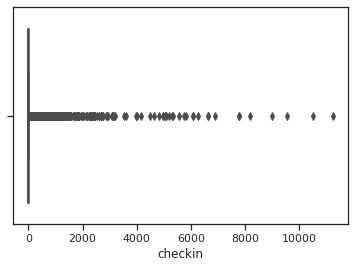

In [17]:
sns.boxplot(x="checkin", data=df_city_group)

<AxesSubplot:xlabel='duration'>

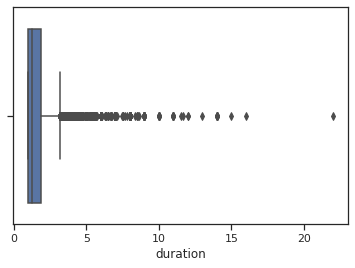

In [18]:
sns.boxplot(x="duration", data=df_city_group)

In [19]:
#df_city_group.sort_values(['duration'], ascending=False).head()

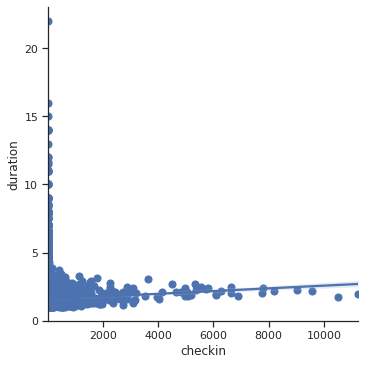

In [20]:
sns.lmplot(x="checkin", y="duration", data=df_city_group, 
           scatter_kws={"s": 50, "alpha": 1})

### Travel to cities per month

In [21]:
df['checkin_month'] = df.checkin.dt.month

In [22]:
df_city_month_group = df.groupby(['city_id', 'checkin_month']).agg({'checkin': 'count', 'duration': 'mean'})\
                    .reset_index().sort_values(['city_id', 'checkin_month', 'checkin'],ascending=False)
df_city_month_group

,city_id,checkin_month,checkin,duration
143226,9999,11,1,1.000000
143225,9999,8,1,2.000000
143224,9996,12,9,1.333333
143223,9996,11,22,1.681818
143222,9996,10,27,1.370370
...,...,...,...,...
4,10002,8,2,5.000000
3,10002,7,1,1.000000
2,10002,6,1,3.000000
1,10002,5,1,2.000000


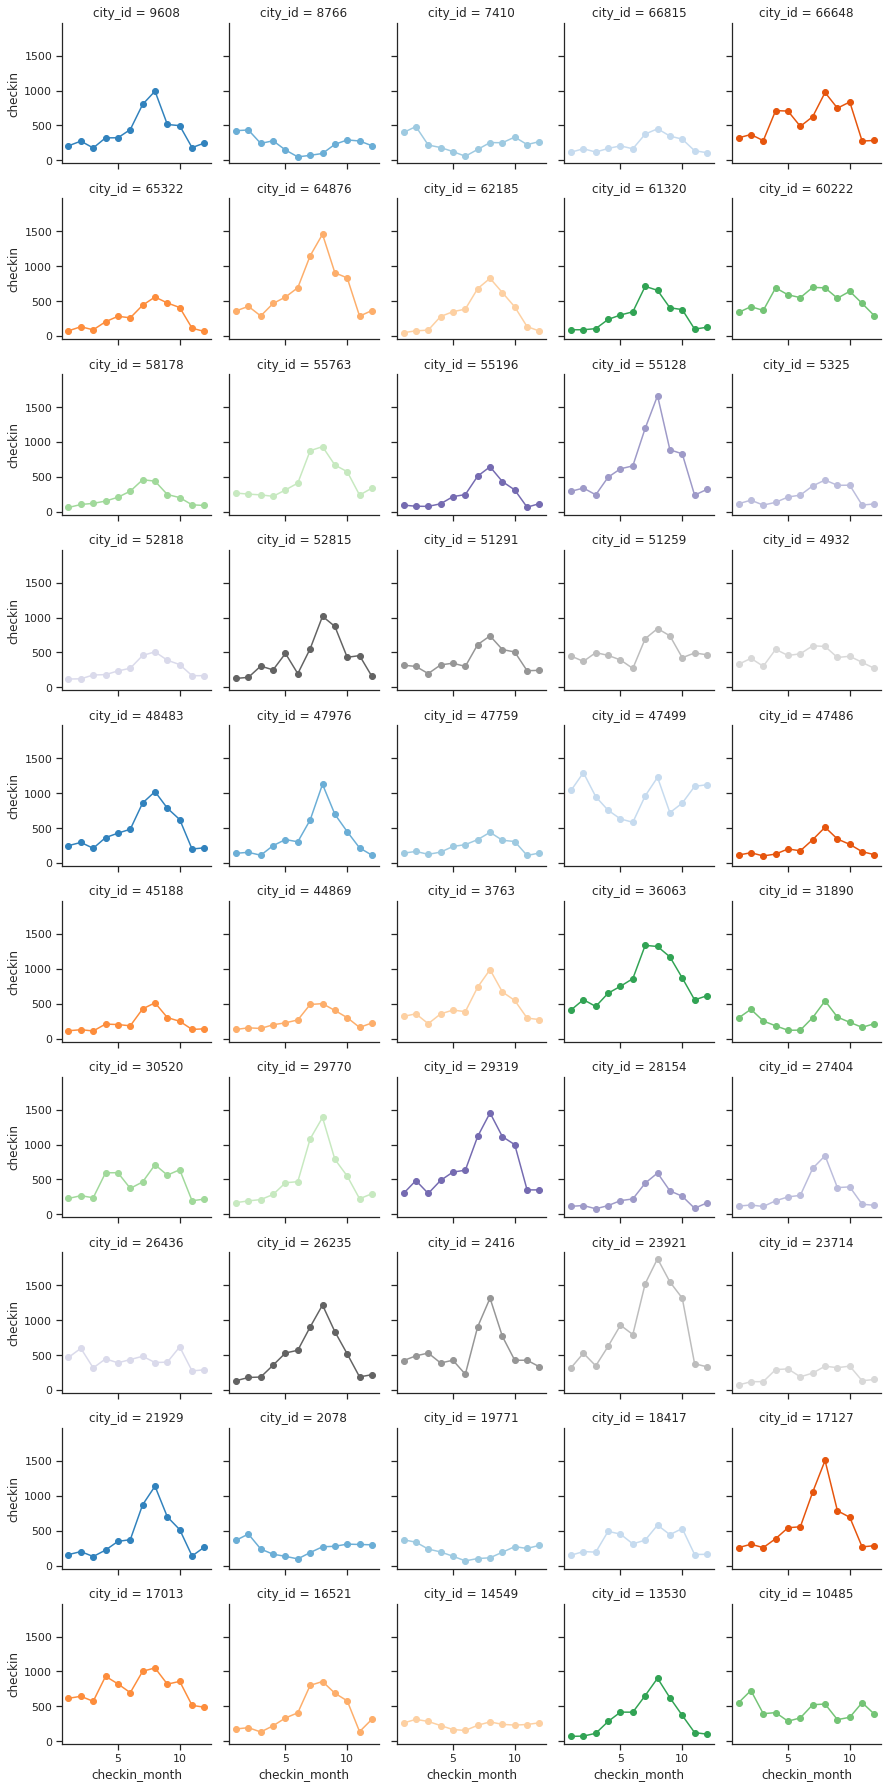

In [23]:
# Initialize a grid of plots with an Axes for each walk
city_idx = list(df_city_group.index)[:50]
df_plot  = df_city_month_group[df_city_month_group.city_id.isin(city_idx)]

grid     = sns.FacetGrid(df_plot, col="city_id", hue="city_id", palette="tab20c",
                     col_wrap=5, height=2.5)
grid.map(plt.plot, "checkin_month", "checkin", marker="o")
grid.fig.tight_layout(w_pad=1)


## device_class 

- **device_class** - desktop/mobile


In [24]:
df.head()

,Unnamed: 0,user_id,checkin,checkout,city_id,device_class,affiliate_id,booker_country,hotel_country,utrip_id,duration,checkin_month
0,0,1006220,2016-04-09,2016-04-11,31114,desktop,384,Gondal,Gondal,1006220_1,2,4
1,1,1006220,2016-04-11,2016-04-12,39641,desktop,384,Gondal,Gondal,1006220_1,1,4
2,2,1006220,2016-04-12,2016-04-16,20232,desktop,384,Gondal,Glubbdubdrib,1006220_1,4,4
3,3,1006220,2016-04-16,2016-04-17,24144,desktop,384,Gondal,Gondal,1006220_1,1,4
4,4,1010293,2016-07-09,2016-07-10,5325,mobile,359,The Devilfire Empire,Cobra Island,1010293_1,1,7


In [25]:
df_device_group = df.groupby('device_class').agg({'checkin': 'count', 'duration': 'mean'})\
                    .sort_values('checkin',ascending=False)

df_device_group.describe()

,checkin,duration
count,3.000000,3.000000
mean,388945.000000,1.718084
std,339984.527164,0.085224
min,81119.000000,1.623858
25%,206487.500000,1.682237
50%,331856.000000,1.740616
75%,542858.000000,1.765197
max,753860.000000,1.789778


<AxesSubplot:xlabel='device_class'>

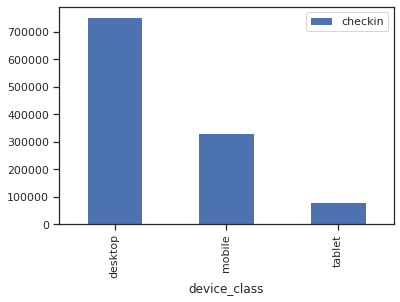

In [26]:
df_device_group[['checkin']].plot(kind='bar')

<AxesSubplot:xlabel='device_class'>

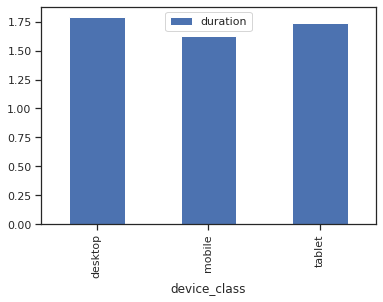

In [27]:
df_device_group[['duration']].plot(kind='bar')

## affiliate_id

- **affiliate_id** - An anonymized ID of affiliate channels where the booker came from (e.g. direct, some third party referrals, paid search engine, etc.)

In [28]:
df.head()

,Unnamed: 0,user_id,checkin,checkout,city_id,device_class,affiliate_id,booker_country,hotel_country,utrip_id,duration,checkin_month
0,0,1006220,2016-04-09,2016-04-11,31114,desktop,384,Gondal,Gondal,1006220_1,2,4
1,1,1006220,2016-04-11,2016-04-12,39641,desktop,384,Gondal,Gondal,1006220_1,1,4
2,2,1006220,2016-04-12,2016-04-16,20232,desktop,384,Gondal,Glubbdubdrib,1006220_1,4,4
3,3,1006220,2016-04-16,2016-04-17,24144,desktop,384,Gondal,Gondal,1006220_1,1,4
4,4,1010293,2016-07-09,2016-07-10,5325,mobile,359,The Devilfire Empire,Cobra Island,1010293_1,1,7


In [29]:
df_group_affiliate = df.groupby('affiliate_id').agg({'checkin': 'count', 'duration': 'mean'})\
                        .reset_index().sort_values('checkin',ascending=False)
df_group_affiliate.describe()

,checkin,duration
count,3254.000000,3254.000000
mean,358.584819,1.928634
std,6287.558770,1.068295
min,1.000000,1.000000
25%,2.000000,1.315789
50%,5.000000,1.710899
75%,19.000000,2.066667
max,277775.000000,16.000000


<AxesSubplot:xlabel='checkin'>

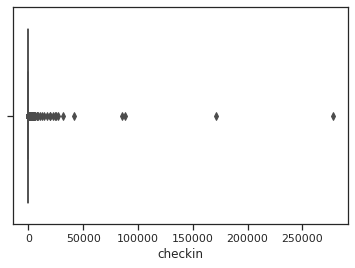

In [30]:
sns.boxplot(x="checkin", data=df_group_affiliate)

<AxesSubplot:xlabel='duration'>

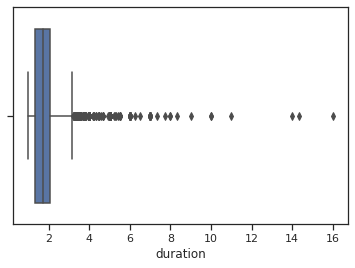

In [31]:
sns.boxplot(x="duration", data=df_group_affiliate)

In [59]:
df_affiliate_id_month_group = df.groupby(['affiliate_id', 'checkin_month']).agg({'checkin': 'count', 'duration': 'mean'})\
                    .reset_index().sort_values(['affiliate_id', 'checkin_month', 'checkin'],ascending=False)
df_affiliate_id_month_group

,affiliate_id,checkin_month,checkin,duration
12937,9990,5,1,1.000000
12936,999,3,1,3.000000
12935,9988,7,1,1.000000
12934,9983,7,2,1.500000
12933,9974,7,1,2.000000
...,...,...,...,...
4,100,8,1,2.000000
3,100,7,7,2.285714
2,100,6,1,3.000000
1,100,5,1,3.000000


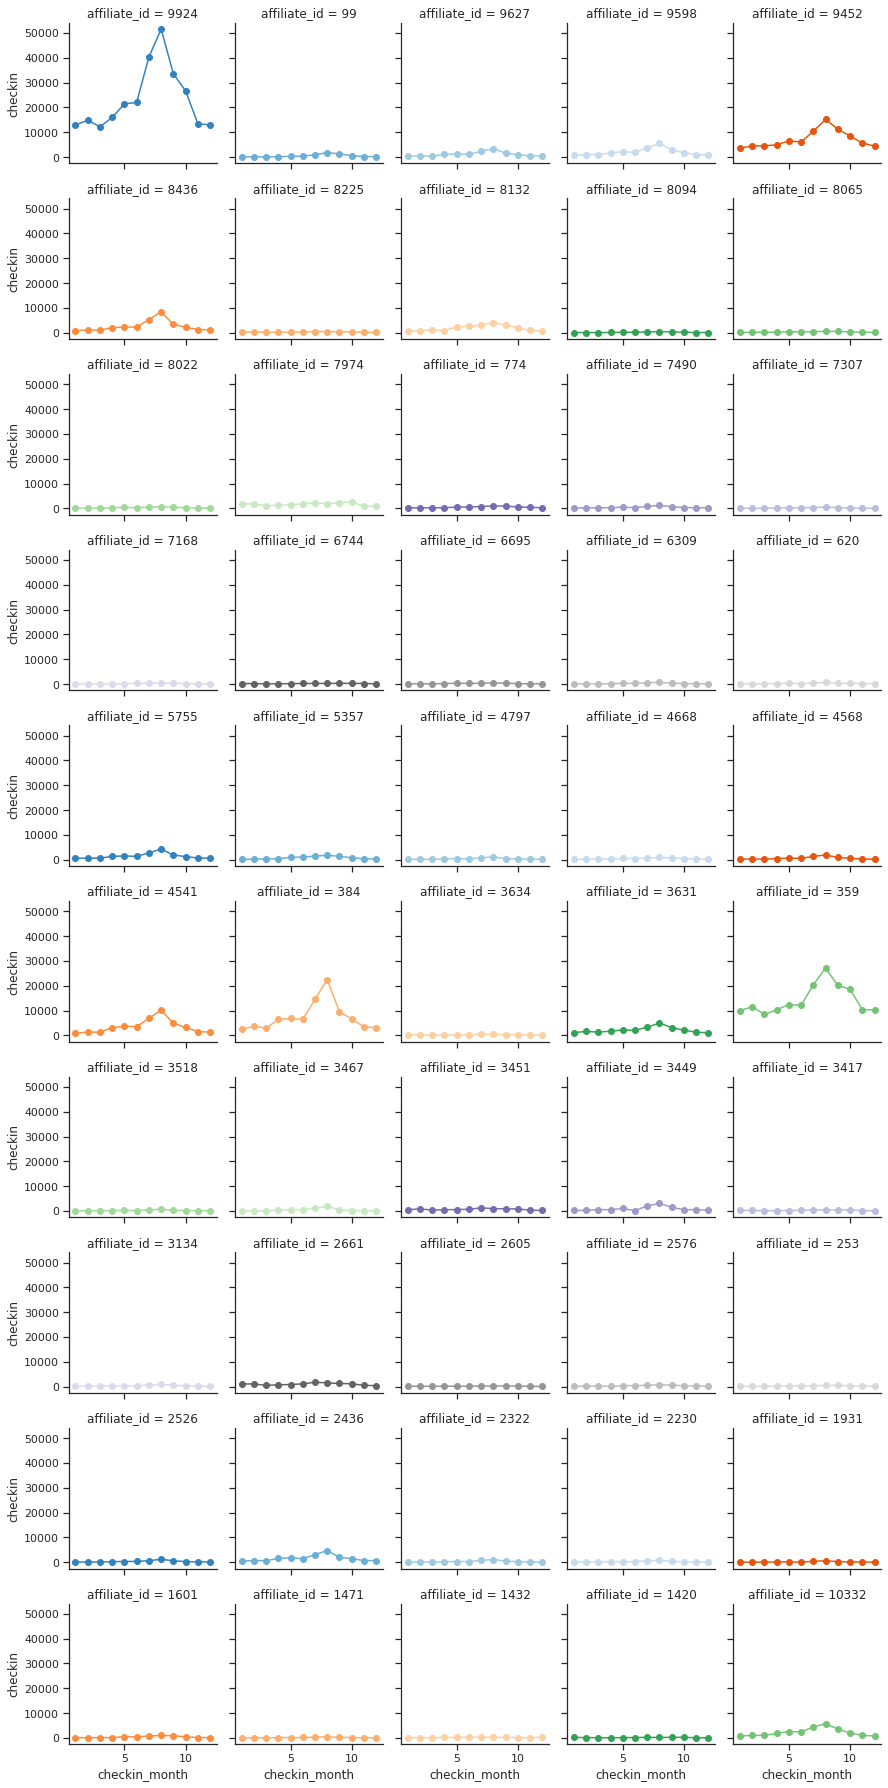

In [64]:
# Initialize a grid of plots with an Axes for each walk
affiliate_id = list(df_group_affiliate.affiliate_id)[:50]
df_plot  = df_affiliate_id_month_group[df_affiliate_id_month_group.affiliate_id.isin(affiliate_id)]

grid     = sns.FacetGrid(df_plot, 
                         col="affiliate_id", hue="affiliate_id", palette="tab20c",
                         col_wrap=5, height=2.5)
grid.map(plt.plot, "checkin_month", "checkin", marker="o")
grid.fig.tight_layout(w_pad=1)


## booker_country

- booker_country - Country from which the reservation was made (anonymized)

In [32]:
df.head()

,Unnamed: 0,user_id,checkin,checkout,city_id,device_class,affiliate_id,booker_country,hotel_country,utrip_id,duration,checkin_month
0,0,1006220,2016-04-09,2016-04-11,31114,desktop,384,Gondal,Gondal,1006220_1,2,4
1,1,1006220,2016-04-11,2016-04-12,39641,desktop,384,Gondal,Gondal,1006220_1,1,4
2,2,1006220,2016-04-12,2016-04-16,20232,desktop,384,Gondal,Glubbdubdrib,1006220_1,4,4
3,3,1006220,2016-04-16,2016-04-17,24144,desktop,384,Gondal,Gondal,1006220_1,1,4
4,4,1010293,2016-07-09,2016-07-10,5325,mobile,359,The Devilfire Empire,Cobra Island,1010293_1,1,7


In [33]:
df_group_booker_country = df.groupby('booker_country').agg({'checkin': 'count', 'duration': 'mean'})\
                        .sort_values('checkin',ascending=False)
df_group_booker_country.describe()

,checkin,duration
count,5.000000,5.000000
mean,233367.000000,1.835304
std,199792.629429,0.288124
min,28638.000000,1.593909
25%,80573.000000,1.714232
50%,235344.000000,1.765123
75%,286244.000000,1.768245
max,536036.000000,2.335013


In [34]:
df_group_booker_country.head()

,checkin,duration
booker_country,,
Gondal,536036,1.714232
The Devilfire Empire,286244,1.593909
Elbonia,235344,1.765123
Tcherkistan,80573,2.335013
Bartovia,28638,1.768245


<AxesSubplot:xlabel='booker_country'>

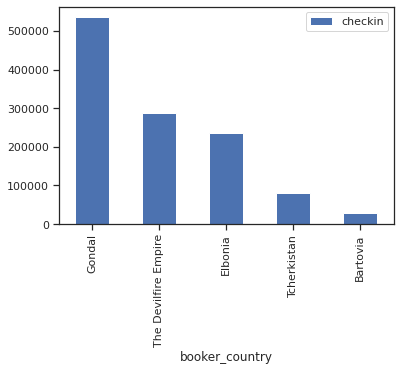

In [35]:
df_group_booker_country[['checkin']].plot(kind='bar')

<AxesSubplot:xlabel='booker_country'>

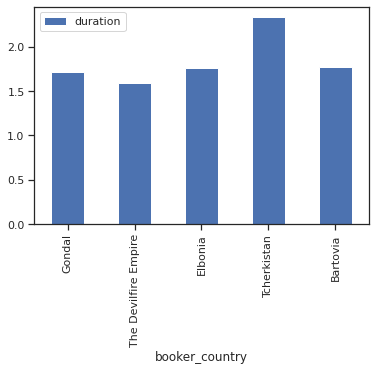

In [36]:
df_group_booker_country[['duration']].plot(kind='bar')

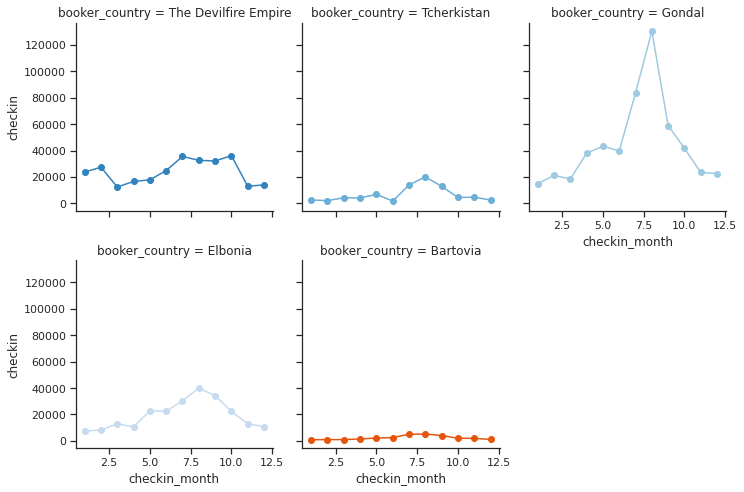

In [37]:
df_group_month_booker_country = df.groupby(['booker_country', 'checkin_month'])\
                                    .agg({'checkin': 'count', 'duration': 'mean'})\
                                    .reset_index()\
                                    .sort_values(['booker_country', 'checkin_month', 'checkin'], ascending=False)

grid     = sns.FacetGrid(df_group_month_booker_country, 
                         col="booker_country", hue="booker_country", palette="tab20c",
                         col_wrap=3, height=3.5)
grid.map(plt.plot, "checkin_month", "checkin", marker="o")
grid.fig.tight_layout(w_pad=1)


## hotel_country

- hotel_country - Country of the hotel (anonymized)

In [38]:
df_hotel_country_group = df.groupby('hotel_country').agg({'checkin': 'count', 'duration': 'mean'})\
                    .sort_values('checkin',ascending=False)

df_hotel_country_group.describe()

,checkin,duration
count,195.000000,195.000000
mean,5983.769231,2.123586
std,17621.819052,0.851130
min,1.000000,1.000000
25%,14.000000,1.661405
50%,199.000000,1.933333
75%,2939.000000,2.250000
max,137791.000000,9.000000


In [39]:
df_hotel_country_group.shape

(195, 2)

<AxesSubplot:xlabel='checkin'>

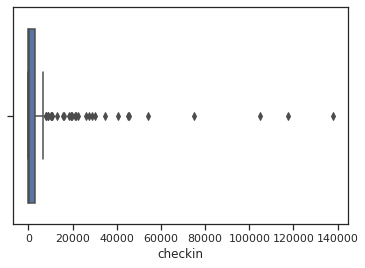

In [40]:
sns.boxplot(x="checkin", data=df_hotel_country_group)

<AxesSubplot:xlabel='duration'>

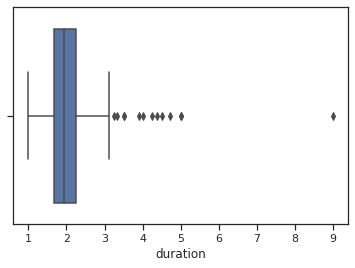

In [41]:
sns.boxplot(x="duration", data=df_hotel_country_group)

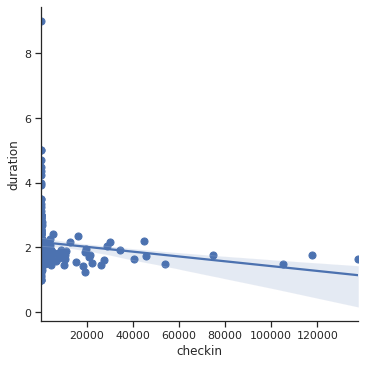

In [42]:
sns.lmplot(x="checkin", y="duration", data=df_hotel_country_group, 
           scatter_kws={"s": 50, "alpha": 1})

In [43]:
df_hotel_country_group

,checkin,duration
hotel_country,,
Cobra Island,137791,1.637836
Fook Island,117717,1.781688
Gondal,104979,1.494070
Glubbdubdrib,74840,1.763055
Elbonia,53965,1.489354
...,...,...
Sardovia,1,4.000000
Medici,1,2.000000
Buenaventura,1,3.000000


In [44]:
df_hotel_country_month_group = df.groupby(['hotel_country', 'checkin_month']).agg({'checkin': 'count', 'duration': 'mean'})\
                    .reset_index().sort_values(['hotel_country', 'checkin_month', 'checkin'],ascending=False)
df_hotel_country_month_group

,hotel_country,checkin_month,checkin,duration
1759,Zephyria,12,40,2.225000
1758,Zephyria,11,117,1.974359
1757,Zephyria,10,76,1.973684
1756,Zephyria,9,70,2.357143
1755,Zephyria,8,81,1.888889
...,...,...,...,...
4,Absurdistan,5,5,1.400000
3,Absurdistan,4,1,2.000000
2,Absurdistan,3,3,2.000000
1,Absurdistan,2,1,2.000000


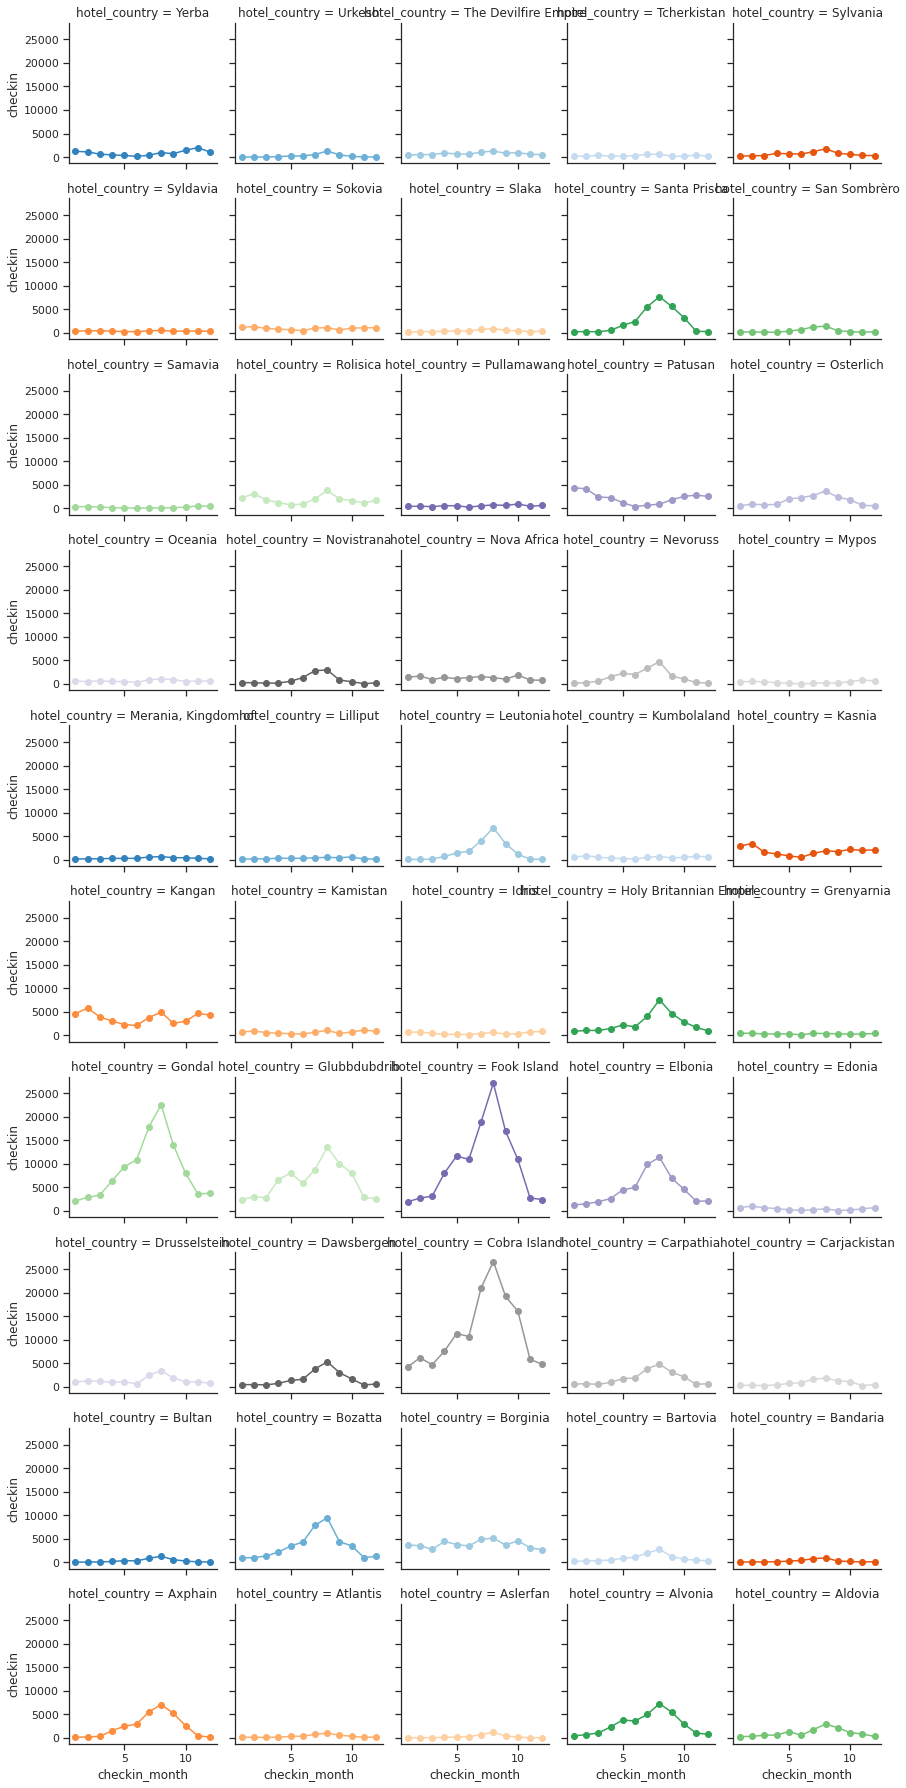

In [45]:
# Initialize a grid of plots with an Axes for each walk
coutry_idx = list(df_hotel_country_group.index)[:50]
df_plot  = df_hotel_country_month_group[df_hotel_country_month_group.hotel_country.isin(coutry_idx)]

grid     = sns.FacetGrid(df_plot, col="hotel_country", hue="hotel_country", palette="tab20c",
                     col_wrap=5, height=2.5)
grid.map(plt.plot, "checkin_month", "checkin", marker="o")
grid.fig.tight_layout(w_pad=1)


### city_id by booker_country

In [46]:
df_city_id_by_hotel_country = df[['hotel_country', 'city_id']].drop_duplicates()\
                                .groupby('hotel_country').count().sort_values('city_id',ascending=False)
df_city_id_by_hotel_country = df_city_id_by_hotel_country.join(df_hotel_country_group)
df_city_id_by_hotel_country

,city_id,checkin,duration
hotel_country,,,
Gondal,6440,104979,1.494070
Fook Island,3986,117717,1.781688
Cobra Island,3582,137791,1.637836
Elbonia,3414,53965,1.489354
Glubbdubdrib,2898,74840,1.763055
...,...,...,...
Nuevo Rico,1,1,1.000000
Buenaventura,1,1,3.000000
Moldavia,1,6,2.166667


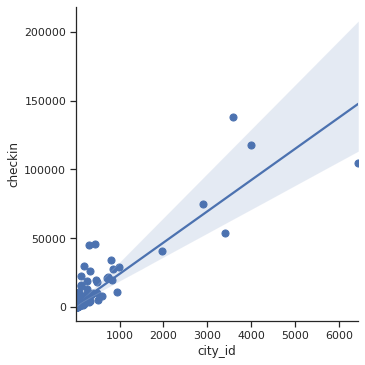

In [47]:
sns.lmplot(x="city_id", y="checkin", data=df_city_id_by_hotel_country, 
           scatter_kws={"s": 50, "alpha": 1})

## utrip_id

- **utrip_id** - Unique identification of user’s trip (a group of multi-destinations bookings within the same trip)

In [68]:
df.head()

,Unnamed: 0,user_id,checkin,checkout,city_id,device_class,affiliate_id,booker_country,hotel_country,utrip_id,duration,checkin_month
0,0,1006220,2016-04-09,2016-04-11,31114,desktop,384,Gondal,Gondal,1006220_1,2,4
1,1,1006220,2016-04-11,2016-04-12,39641,desktop,384,Gondal,Gondal,1006220_1,1,4
2,2,1006220,2016-04-12,2016-04-16,20232,desktop,384,Gondal,Glubbdubdrib,1006220_1,4,4
3,3,1006220,2016-04-16,2016-04-17,24144,desktop,384,Gondal,Gondal,1006220_1,1,4
4,4,1010293,2016-07-09,2016-07-10,5325,mobile,359,The Devilfire Empire,Cobra Island,1010293_1,1,7


In [84]:
def count_hotel(hotel_country):
    return len(list(np.unique(hotel_country)))

def join_city(city):
    return "_".join(list(city))

df_utrip_id_group = df.groupby('utrip_id').agg({'checkin': 'count', 
                                                'duration': ['mean', 'sum'], 
                                                'hotel_country': count_hotel,
                                                'city_id': join_city})
df_utrip_id_group.columns = ["_".join(pair) for pair in df_utrip_id_group.columns]
df_utrip_id_group = df_utrip_id_group.sort_values('checkin_count', ascending=False)

df_utrip_id_group['multiply_country'] = (df_utrip_id_group['hotel_country_count_hotel'] > 1).astype(int)
df_utrip_id_group
#df_utrip_id_group.describe()

,checkin_count,duration_mean,duration_sum,hotel_country_count_hotel,city_id_join_city,multiply_country
utrip_id,,,,,,
3635431_3,48,1.041667,50,1,47319_36063_36063_36063_3109_3109_3109_3109_31...,0
2209265_10,45,1.044444,47,1,58974_58974_58974_58974_58974_58974_58974_5897...,0
433188_8,44,1.000000,44,1,26951_26951_26951_26951_26951_26951_26951_2695...,0
2209265_15,41,1.000000,41,2,9723_9723_9723_9723_9723_9723_9723_9723_9723_9...,1
5231140_3,41,1.170732,48,2,20777_57730_35312_54408_12131_12131_37103_3443...,1
...,...,...,...,...,...,...
6063380_1,1,1.000000,1,1,17127,0
199297_1,1,1.000000,1,1,28483,0
3874822_3,1,1.000000,1,1,19700,0


In [76]:
df_utrip_id_group.shape

(217686, 5)

/home/marlesson/anaconda3/envs/booking_challenge/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


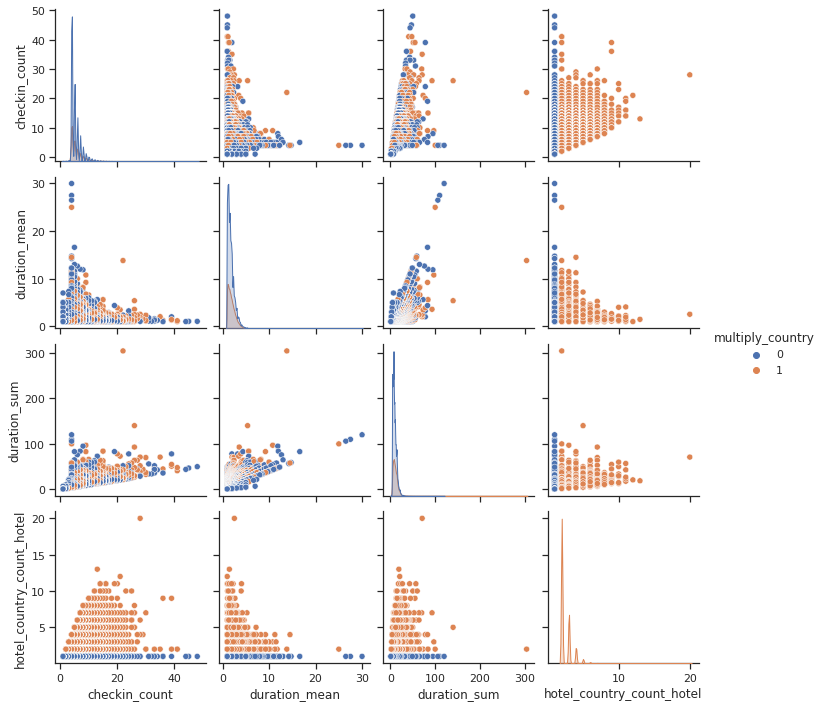

In [75]:
sns.pairplot(df_utrip_id_group, hue="multiply_country")


In [71]:
df_utrip_id_group.describe()

,checkin_count,duration_mean,duration_sum,hotel_country_count_hotel,multiply_country
count,217686.000000,217686.000000,217686.000000,217686.000000,217686.000000
mean,5.360175,1.781976,9.322262,1.414092,0.277932
std,2.014324,0.807122,4.759996,0.800053,0.447981
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,1.200000,6.000000,1.000000,0.000000
50%,5.000000,1.571429,8.000000,1.000000,0.000000
75%,6.000000,2.166667,12.000000,2.000000,1.000000
max,48.000000,30.000000,304.000000,20.000000,1.000000


<AxesSubplot:xlabel='checkin_count'>

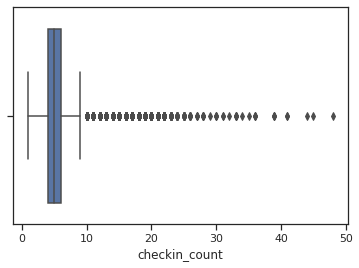

In [72]:
sns.boxplot(x="checkin_count", data=df_utrip_id_group)

<AxesSubplot:xlabel='hotel_country_count_hotel'>

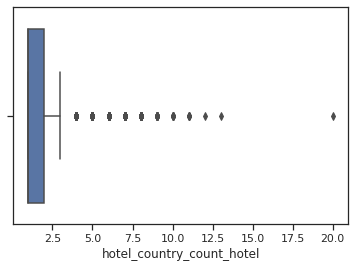

In [73]:
sns.boxplot(x="hotel_country_count_hotel", data=df_utrip_id_group)

<AxesSubplot:xlabel='duration_sum'>

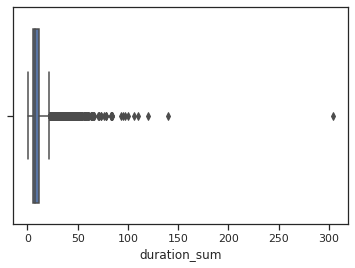

In [74]:
sns.boxplot(x="duration_sum", data=df_utrip_id_group)

Dataset has a lot of outliers

### df_utrip_id_group

In [95]:
df_utrip_id_group_join_city = df_utrip_id_group.groupby("city_id_join_city")\
                    .agg({'checkin_count': 'count',
                         'duration_sum': 'mean'})\
                    .sort_values('checkin_count', ascending=False)

df_utrip_id_group_join_city

,checkin_count,duration_sum
city_id_join_city,,
51259_51259_51259_51259,379,7.424802
36063_36063_36063_36063,166,6.337349
64876_55128_9608_17127,148,9.229730
52815_52815_52815_52815,136,7.227941
51259_51259_51259_51259_51259,134,9.261194
...,...,...
29319_40794_12302_65322_23921,1,8.000000
29319_40794_12975_3914_27079_48483,1,15.000000
29319_40794_18673_48483_5325_29319_29319,1,12.000000


In [96]:
df_utrip_id_group_join_city.describe()

,checkin_count,duration_sum
count,200701.000000,200701.000000
mean,1.084628,9.409662
std,1.517550,4.765061
min,1.000000,1.000000
25%,1.000000,6.000000
50%,1.000000,8.000000
75%,1.000000,12.000000
max,379.000000,304.000000


In [89]:
df[df.city_id == '51259']

,Unnamed: 0,user_id,checkin,checkout,city_id,device_class,affiliate_id,booker_country,hotel_country,utrip_id,duration,checkin_month
269,269,1341253,2016-12-08,2016-12-10,51259,mobile,9452,Elbonia,Oceania,1341253_5,2,12
270,270,1341253,2016-12-10,2016-12-11,51259,mobile,9452,Elbonia,Oceania,1341253_5,1,12
1142,1142,2171055,2016-09-26,2016-09-30,51259,mobile,384,Gondal,Oceania,2171055_1,4,9
1740,1740,2729915,2016-05-29,2016-05-31,51259,mobile,9452,Tcherkistan,Oceania,2729915_1,2,5
1741,1741,2729915,2016-05-31,2016-06-02,51259,mobile,9452,Tcherkistan,Oceania,2729915_1,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1165034,1165034,5038716,2016-05-01,2016-05-02,51259,mobile,9452,Tcherkistan,Oceania,5038716_1,1,5
1165179,1165179,5183986,2016-01-10,2016-01-13,51259,desktop,2803,Tcherkistan,Oceania,5183986_1,3,1
1165180,1165180,5183986,2016-01-13,2016-01-16,51259,mobile,359,Tcherkistan,Oceania,5183986_1,3,1
1166267,1166267,61218,2016-11-16,2016-11-17,51259,desktop,9924,The Devilfire Empire,Oceania,61218_2,1,11


In [93]:
df[df.utrip_id == '5038716_1']

,Unnamed: 0,user_id,checkin,checkout,city_id,device_class,affiliate_id,booker_country,hotel_country,utrip_id,duration,checkin_month
1165031,1165031,5038716,2016-04-28,2016-04-29,51259,desktop,4797,Tcherkistan,Oceania,5038716_1,1,4
1165032,1165032,5038716,2016-04-29,2016-04-30,51259,desktop,4797,Tcherkistan,Oceania,5038716_1,1,4
1165033,1165033,5038716,2016-04-30,2016-05-01,51259,mobile,10332,Tcherkistan,Oceania,5038716_1,1,4
1165034,1165034,5038716,2016-05-01,2016-05-02,51259,mobile,9452,Tcherkistan,Oceania,5038716_1,1,5
